# Regression Using ML

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(precision=3, suppress=True)

In [119]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [120]:
raw_train = pd.read_csv('../data/train.csv')
raw_test = pd.read_csv('../data/test.csv')

train_data = raw_train.copy()
test_data = raw_test.copy()

train_features = train_data.copy()
test_features = test_data.copy()

train_labels = train_features.pop('Distance')
test_labels = test_features.pop('Distance')

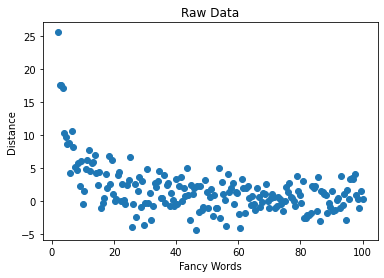

In [121]:
words = train['Fancy Words']
dist = train['Distance']

plt.figure()
plt.xlabel('Fancy Words')
plt.ylabel('Distance')
plt.title('Raw Data')
plt.scatter(words, dist)

In [122]:
fancy_words = np.array(train_features['Fancy Words'])

word_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
word_normalizer.adapt(fancy_words)

In [123]:
word_model = tf.keras.Sequential([
    word_normalizer,
    layers.Dense(units=1)
])

word_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_10 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [124]:
word_model.predict(fancy_words)

word_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [125]:
history = word_model.fit(
    train_features['Fancy Words'], train_labels,
    epochs = 700,
    verbose = 0,
    validation_split = 0.2
)

In [126]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
695,2.261752,2.247039,695
696,2.262001,2.219971,696
697,2.262138,2.221533,697
698,2.261982,2.193272,698
699,2.263206,2.217352,699


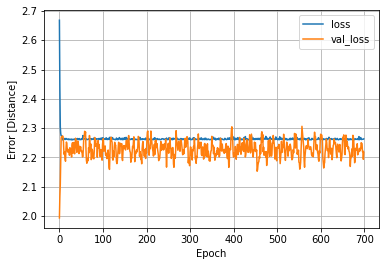

In [127]:
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [Distance]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [128]:
test_results = {}

test_results['word_model'] = word_model.evaluate(
    test_features['Fancy Words'],
    test_labels, verbose=0
)

In [129]:
x = tf.linspace(0.0, 100, 101)
y = word_model.predict(x)

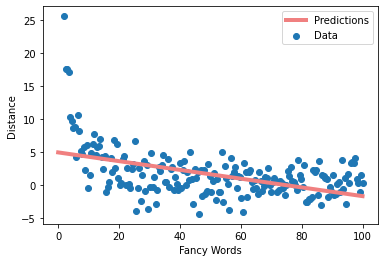

In [130]:
def plot_words(x, y):
    plt.figure()
    plt.scatter(train_features['Fancy Words'], train_labels, label='Data')
    plt.plot(x, y,  label='Predictions', color='lightcoral', linewidth=4)
    plt.xlabel('Fancy Words')
    plt.ylabel('Distance')
    plt.legend()

plot_words(x, y)